# Proyek Analisis Data: [Bike-sharing dataset]
- **Nama:** Kadek Artha Darma Pradnyana
- **Email:** artadarma37@gmail.com
- **ID Dicoding:** arthad

## **Menentukan Pertanyaan Bisnis**

**Latar Belakang Dataset**

Proses penyewaan sepeda sangat berkolerasi dengan keaadaan lingkungan dan musim. Contohnya, kondisi cuaca, curah hujan, hari dalam minggu, dan faktor lingkungan lainnya dapat mempengaruhi perilaku penyewaan. Dataset ini merupakan catatan historis penyewaan sepeda selama dua tahun (dari tahun 2011 hingga 2021) dari Capital Bikeshare System, Washington D.C., Amerika Serikat. Dataset ini teragregasi dalam dua ukuran yaitu ukuran perjam dan ukuran harian, kemudian ditambahkan dengan informasi lingkungan & sosial yang sesuai.

- Bagaimana jumlah penyewaan pada setiap musim ataupun cuaca?
- Bagaimana jumlah penyewaan pada setiap hari kerja ataupun hari libur?
- Bagaimana korelasi antar variabel numerik pada dataset? (Variabel suhu, suhu semu, kelembapan, kecepatan angin dan total jumlah penyewa)
- Bagaimana tren penyewaan setiap harinya selama tahun 2011 - 2012?

## **Import Semua Packages/Library yang Digunakan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Format visual pada tabel.

## **Data Wrangling**

### Gathering Data

In [ ]:
# Memuat data penyewaan sepeda harian dari github
daily_df = pd.read_csv("https://raw.githubusercontent.com/Arthdrm/PublicDatasets/main/Bike-sharing-dataset/day.csv")
daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Memuat data penyewaan sepeda perjam dari github
hourly_df = pd.read_csv("https://raw.githubusercontent.com/Arthdrm/PublicDatasets/main/Bike-sharing-dataset/hour.csv")
hourly_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Terlihat bahwa kedua dataset telah berhasil dimuat kedalam dataframe pandas. Berdasarkan informasi dataset yang diberikan pada file readme, berikut merupakan keterangan dari kolom-kolom dataset:


* **instant**: index baris data
* **dteday**: tanggal dalam format YYYY-MM-DD
* **season**: musim (1:semi, 2:panas, 3:gugur, 4: dingin)
* **yr**: tahun (0: 2011, 1: 2012)
* **mnth**: bulan (1 - 12)
* **hr**: jam (0 - 23, hanya tersedia di hourly_df)
* **holiday**: status hari libur (0: tidak libur, 1: libur)
* **weekday**: hari dalam minggu (0: senin,..., 6: minggu)
* **workingday**: status hari kerja (0: bukan hari kerja, 1: hari kerja)
* **weathersit**: cuaca (1 - 4)
  * 1: Cerah, sedikit/sebagian berawan
  * 2: Kabut + mendung
  * 3: Salju ringan, hujan ringan + badai petir
  * 4: Hujan lebat + hujan es, kabut + salju/badai petir
* **temp**: Suhu pengukuran dalam celcius yang telah dinormalisasi (dibagi 41)
* **atemp**: Suhu tampak/semu dalam celcius yang telah dinormalisasi (dibagi 50)
* **hum**: Kelembapan yang telah dinormalisasi (dibagi 100)
* **windspeed**: Kecepatan angin yang telah dinormalisasi (dibagi 67)
* **casual**: jumlah penyewaan sepeda oleh pengguna kasual (pengguna yang tidak teregistrasi)
* **registered**: jumlah penyewaan sepeda oleh pengguna teregistrasi
* **cnt**: jumlah total penyewaan sepeda kasual + teregistrasi

Kategorisasi data:
- Data Kategoris (Nominal):
  - dteday
  - season
  - yr
  - holiday
  - weekday
  - workingday
  - weathersit

- Data Kategoris (Ordinal):
  - mnth
  - hr

- Data Numerik (Diskrit):
  - casual
  - registered
  - cnt

- Data Numerik (Kontinyu):
  - temp
  - atemp
  - hum
  - windspeed
  




### Assessing Data

In [ ]:
# Memeriksa anatomi dari daily_df
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Memeriksa anatomi dari daily_df
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Memeriksa value null pada daily_df
print(f"Data null pada daily_df:\n{daily_df.isna().sum()}")

Data null pada daily_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# Memeriksa value null pada hourly_df
print(f"Data null pada hourly_df:\n{hourly_df.isna().sum()}")

Data null pada hourly_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# Memeriksa data duplikat pada daily_df
print(f"Data duplikat pada daily_df:\n{daily_df.duplicated().sum()}")

Data duplikat pada daily_df:
0


In [ ]:
# Memeriksa data duplikat pada hourly_df
print(f"Data duplikat pada hourly_df:\n{hourly_df.duplicated().sum()}")

Data duplikat pada hourly_df:
0


In [ ]:
# Menerapkan statistik deskriptif dasar pada daily_df
daily_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Menerapkan statistik deskriptif dasar pada hourly_df
hourly_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan pemeriksaan data diatas, dapat kita simpulkan beberapa hal berikut:



* Terdapat ketidaksesuaian tipe data pada kolom **dteday** pada kedua dataframe.
* Terdapat beberapa kolom kategoris yang nilainya ter-encode menjadi nilai numerik seperti kolom **season**, **weekday**, **weathersit**, **holiday**, **yr**, **mnth**, dan **workingday**. Untuk memperjelas keterangan visualisasi nantinya, kita akan mengubah nilai pada kolom-kolom ini menjadi nilai deskriptif.
* Tidak ditemukan nilai null maupun nilai duplikat pada kedua dataframe.
* Berdasarkan statistik deskriptif yang telah diterapkan, tidak ditemukan anomali terhadap kedua dataframe.



### Cleaning Data

Membersihkan daily_df


---



In [ ]:
# Mengkonversi tipe data kolom dteday dari object ke datetime
daily_df['dteday'] = pd.to_datetime(daily_df['dteday'])
print(daily_df.dtypes)
daily_df.head(1)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [ ]:
# Pemetaan nilai kolom season
season_mapping = {
    1: 'Semi',
    2: 'Panas',
    3: 'Gugur',
    4: 'Dingin'
}
daily_df['season'] = daily_df['season'].map(season_mapping)
daily_df['season'].value_counts()

Gugur     188
Panas     184
Semi      181
Dingin    178
Name: season, dtype: int64

In [ ]:
# Pemetaan nilai kolom weathersit
weathersit_mapping = {
    1: 'Cerah',
    2: 'Mendung',
    3: 'Hujan Ringan',
    4: 'Badai Petir'
}
daily_df['weathersit'] = daily_df['weathersit'].map(weathersit_mapping)
daily_df['weathersit'].value_counts()

Cerah           463
Mendung         247
Hujan Ringan     21
Name: weathersit, dtype: int64

In [ ]:
# Pemetaan nilai kolom holiday
holiday_mapping = {
    0: 'Bukan Hari Libur',
    1: 'Hari Libur',
}
daily_df['holiday'] = daily_df['holiday'].map(holiday_mapping)
daily_df['holiday'].value_counts()

Bukan Hari Libur    710
Hari Libur           21
Name: holiday, dtype: int64

In [ ]:
# Pemetaan nilai kolom workingday
workingday_mapping = {
    0: 'Bukan Hari Kerja',
    1: 'Hari Kerja',
}
daily_df['workingday'] = daily_df['workingday'].map(workingday_mapping)
daily_df['workingday'].value_counts()

Hari Kerja          500
Bukan Hari Kerja    231
Name: workingday, dtype: int64

In [ ]:
# Pemetaan nilai kolom mnth
mnth_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'Mei',
    6: 'Jun',
    7: 'Jul',
    8: 'Agu',
    9: 'Sep',
    10: 'Okt',
    11: 'Nov',
    12: 'Des'
}
daily_df['mnth'] = daily_df['mnth'].map(mnth_mapping)
daily_df['mnth'].value_counts()

Jan    62
Mar    62
Mei    62
Jul    62
Agu    62
Okt    62
Des    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    57
Name: mnth, dtype: int64

In [ ]:
# Pemetaan nilai kolom yr
yr_mapping = {
    0: 2011,
    1: 2012,
}
daily_df['yr'] = daily_df['yr'].map(yr_mapping)
daily_df['yr'].value_counts()

2012    366
2011    365
Name: yr, dtype: int64

In [ ]:
# Pemetaan nilai kolom weekday
weekday_mapping = {
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
}
daily_df['weekday'] = daily_df['weekday'].map(weekday_mapping)
daily_df['weekday'].value_counts()

Minggu    105
Senin     105
Selasa    105
Rabu      104
Kamis     104
Jumat     104
Sabtu     104
Name: weekday, dtype: int64

Membersihkan hourly_df


---



In [ ]:
# Mengkonversi tipe data kolom dteday dari object ke datetime
hourly_df['dteday'] = pd.to_datetime(hourly_df['dteday'])
print(hourly_df.dtypes)
hourly_df.head(1)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [ ]:
# Pemetaan nilai kolom season
hourly_df['season'] = hourly_df['season'].map(season_mapping)
hourly_df['season'].value_counts()

Gugur     4496
Panas     4409
Semi      4242
Dingin    4232
Name: season, dtype: int64

In [ ]:
# Pemetaan nilai kolom weathersit
hourly_df['weathersit'] = hourly_df['weathersit'].map(weathersit_mapping)
hourly_df['weathersit'].value_counts()

Cerah           11413
Mendung          4544
Hujan Ringan     1419
Badai Petir         3
Name: weathersit, dtype: int64

In [ ]:
# Pemetaan nilai kolom holiday
hourly_df['holiday'] = hourly_df['holiday'].map(holiday_mapping)
hourly_df['holiday'].value_counts()

Bukan Hari Libur    16879
Hari Libur            500
Name: holiday, dtype: int64

In [ ]:
# Pemetaan nilai kolom workingday
hourly_df['workingday'] = hourly_df['workingday'].map(workingday_mapping)
hourly_df['workingday'].value_counts()

Hari Kerja          11865
Bukan Hari Kerja     5514
Name: workingday, dtype: int64

## **Exploratory Data Analysis (EDA)**


### Explore daily_df

In [ ]:
# Menghitung total jumlah penyewaan (2011-2012)
print(f"Total penyewaan kasual + teregistrasi (2011-2012): {daily_df.cnt.sum()}")
print(f"Total penyewaan teregistrasi (2011-2012): {daily_df.registered.sum()}")
print(f"Total penyewaan kasual (2011-2012): {daily_df.casual.sum()}")

Total penyewaan kasual + teregistrasi (2011-2012): 3292679
Total penyewaan teregistrasi (2011-2012): 2672662
Total penyewaan kasual (2011-2012): 620017


In [ ]:
# Jumlah penyewa berdasarkan hari dalam minggu
daily_df.groupby("weekday", as_index=False).agg({
    'cnt':'sum',
    'casual': 'sum',
    'registered': 'sum'
})

,weekday,cnt,casual,registered
0,Jumat,485395,61460,423935
1,Kamis,473048,57319,415729
2,Minggu,477807,153852,323955
3,Rabu,469109,57843,411266
4,Sabtu,487790,78238,409552
5,Selasa,455503,70784,384719
6,Senin,444027,140521,303506


In [ ]:
# Jumlah penyewa berdasarkan status hari libur
daily_df.groupby("holiday", as_index=False).agg({
    'cnt':'sum',
    'casual': 'sum',
    'registered': 'sum'
})

,holiday,cnt,casual,registered
0,Bukan Hari Libur,3214244,597658,2616586
1,Hari Libur,78435,22359,56076


In [ ]:
# Jumlah penyewa berdasarkan status hari kerja
daily_df.groupby("workingday", as_index=False).agg({
    'cnt':'sum',
    'casual': 'sum',
    'registered': 'sum'
})

,workingday,cnt,casual,registered
0,Bukan Hari Kerja,1000269,316732,683537
1,Hari Kerja,2292410,303285,1989125


In [ ]:
# Jumlah penyewa berdasarkan kondisi cuaca
daily_df.groupby("weathersit", as_index=False).agg({
    'cnt':'sum',
    'casual': 'sum',
    'registered': 'sum'
})

,weathersit,cnt,casual,registered
0,Cerah,2257952,446346,1811606
1,Hujan Ringan,37869,3895,33974
2,Mendung,996858,169776,827082


In [ ]:
# Jumlah penyewa berdasarkan musim
daily_df.groupby("season", as_index=False).agg({
    'cnt':'sum',
    'casual': 'sum',
    'registered': 'sum'
})

,season,cnt,casual,registered
0,Dingin,841613,129782,711831
1,Gugur,1061129,226091,835038
2,Panas,918589,203522,715067
3,Semi,471348,60622,410726


In [ ]:
# Jumlah penyewa berdasarkan bulan
daily_df.groupby("mnth", as_index=False).agg({
    'cnt':'sum',
    'casual': 'sum',
    'registered': 'sum'
}).sort_values(by='cnt')

,mnth,cnt,casual,registered
4,Jan,134933,12042,122891
3,Feb,151352,14963,136389
2,Des,211036,21693,189343
7,Mar,228920,44444,184476
9,Nov,254831,36603,218228
1,Apr,269094,60802,208292
10,Okt,322352,59760,262592
8,Mei,331686,75285,256401
5,Jul,344948,78157,266791
11,Sep,345991,70323,275668


In [ ]:
# Jumlah penyewa berdasarkan tahun
daily_df.groupby("yr", as_index=False).agg({
    'cnt':'sum',
    'casual': 'sum',
    'registered': 'sum'
})

,yr,cnt,casual,registered
0,2011,1243103,247252,995851
1,2012,2049576,372765,1676811


In [ ]:
# Membuat tabel korelasi (pearson)
kolom_numerik = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
daily_df[kolom_numerik].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


In [ ]:
daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Semi,2011,Jan,Bukan Hari Libur,Minggu,Bukan Hari Kerja,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,Jan,Bukan Hari Libur,Senin,Bukan Hari Kerja,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,Jan,Bukan Hari Libur,Selasa,Hari Kerja,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,Jan,Bukan Hari Libur,Rabu,Hari Kerja,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,Jan,Bukan Hari Libur,Kamis,Hari Kerja,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


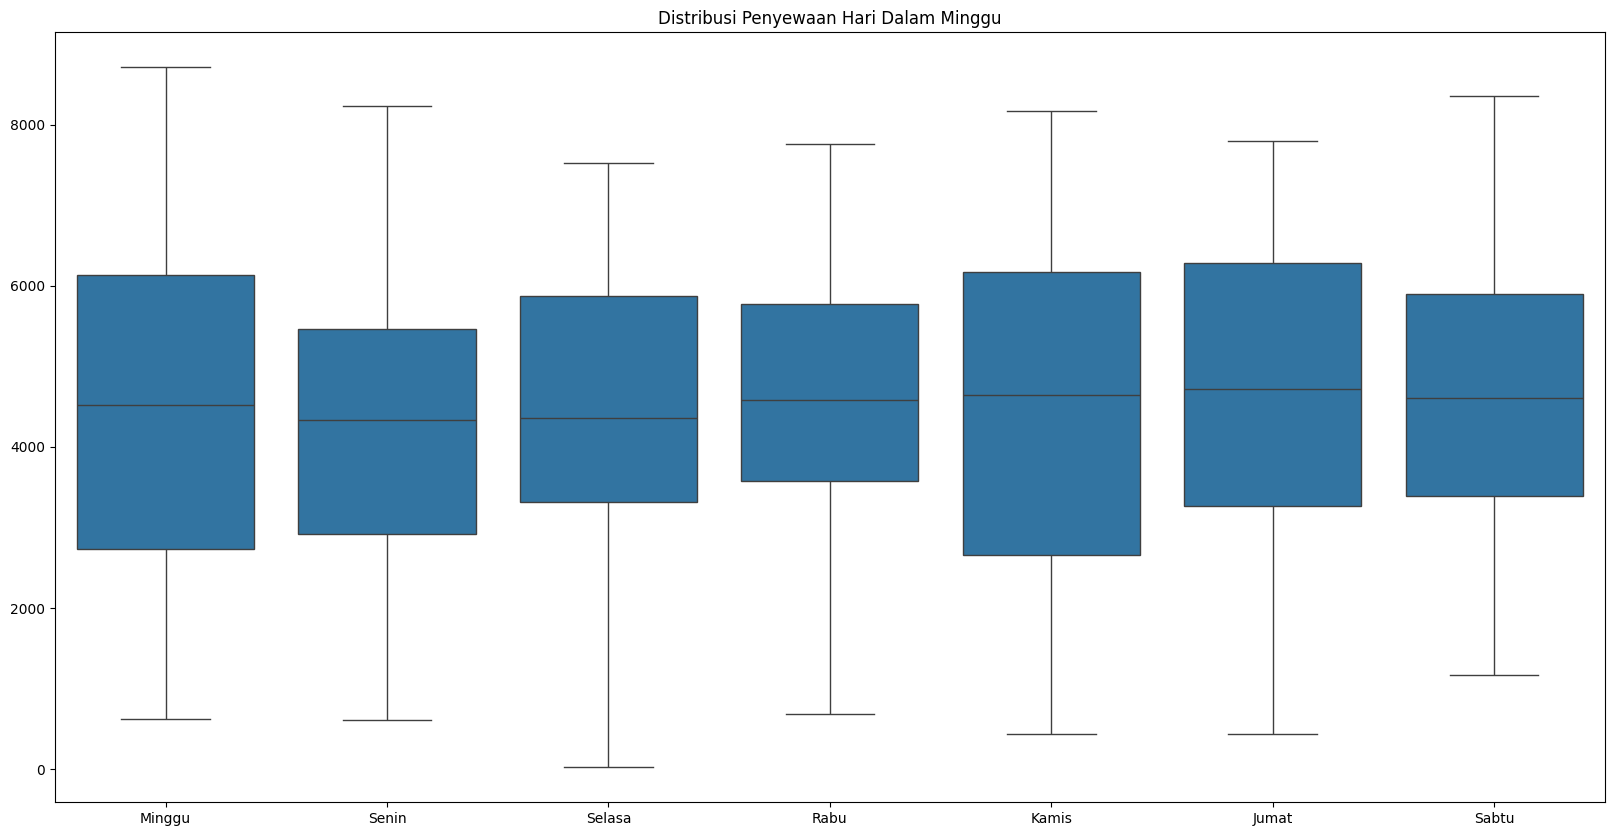

In [ ]:
# Membuat boxplot untuk memvisualisasi distribusi penyewaan hari dalam minggu selama tahun 2011 - 2012
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(
  x=daily_df['weekday'],
  y=daily_df['cnt']
)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Distribusi Penyewaan Hari Dalam Minggu")
plt.show()

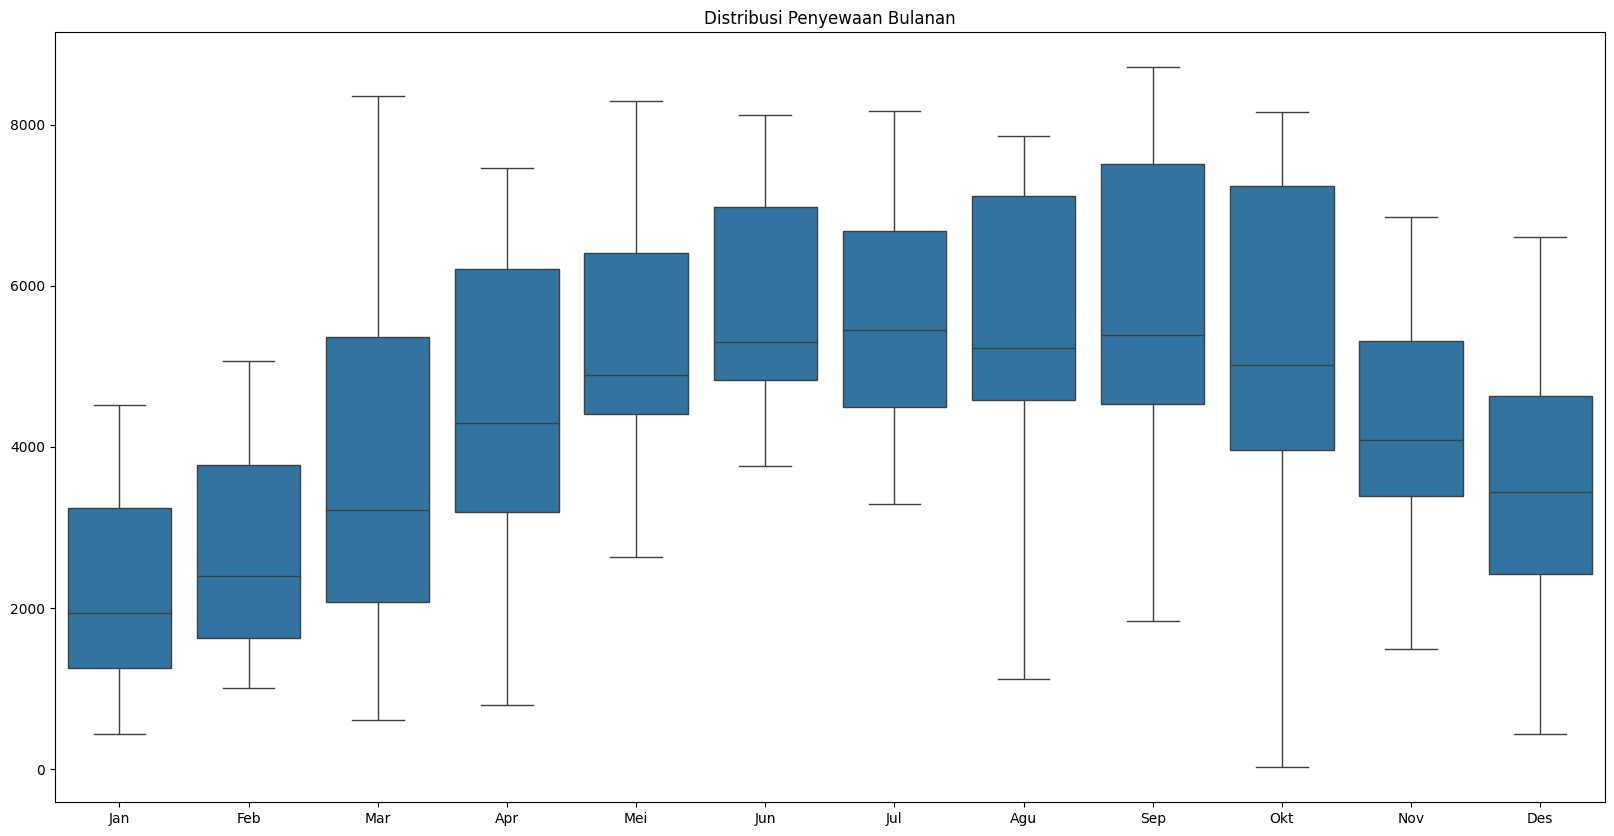

In [ ]:
# Membuat boxplot untuk memvisualisasi distribusi penyewaan bulanan selama tahun 2011 - 2012
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(
  x=daily_df['mnth'],
  y=daily_df['cnt']
)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Distribusi Penyewaan Bulanan")
plt.show()

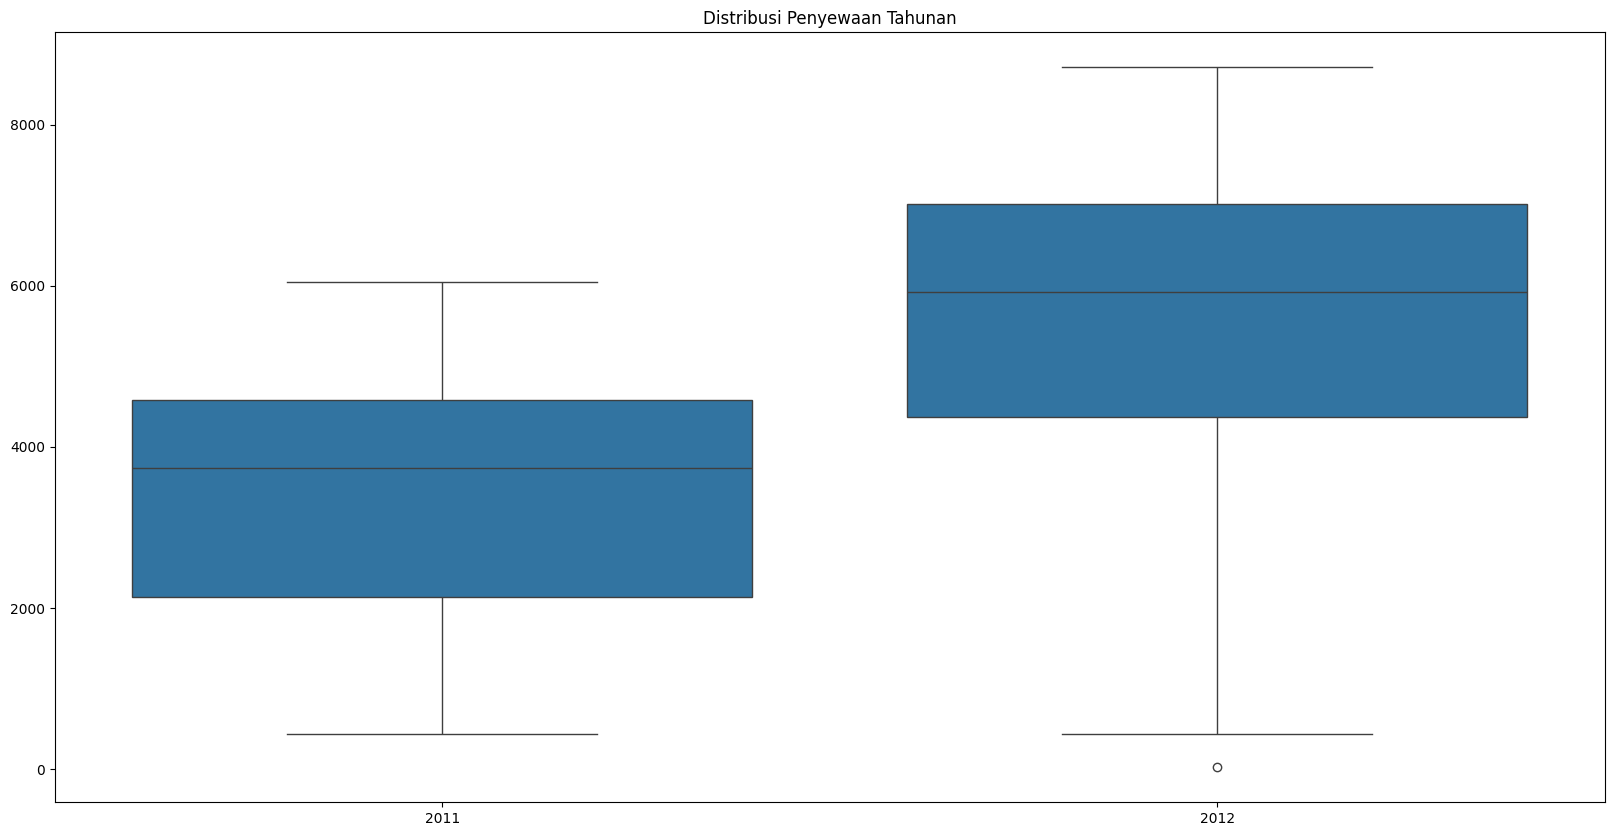

In [ ]:
# Membuat boxplot untuk memvisualisasi distribusi penyewaan tahunan selama tahun 2011 - 2012
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(
  x=daily_df['yr'],
  y=daily_df['cnt']
)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Distribusi Penyewaan Tahunan")
plt.show()

In [ ]:
# Menelurusuri lebih lanjut outlier yang terdapat pada tahun 2012
daily_df[daily_df['yr'] == 2012].sort_values(by='cnt').head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,Dingin,2012,Okt,Bukan Hari Libur,Selasa,Hari Kerja,Hujan Ringan,0.440000,0.439400,0.880000,0.358200,2,20,22
725,726,2012-12-26,Semi,2012,Des,Bukan Hari Libur,Kamis,Hari Kerja,Hujan Ringan,0.243333,0.220333,0.823333,0.316546,9,432,441
723,724,2012-12-24,Semi,2012,Des,Bukan Hari Libur,Selasa,Hari Kerja,Mendung,0.231304,0.258900,0.791304,0.077230,174,746,920
724,725,2012-12-25,Semi,2012,Des,Hari Libur,Rabu,Bukan Hari Kerja,Mendung,0.291304,0.294465,0.734783,0.168726,440,573,1013
477,478,2012-04-22,Panas,2012,Apr,Bukan Hari Libur,Senin,Bukan Hari Kerja,Hujan Ringan,0.396667,0.389504,0.835417,0.344546,120,907,1027



### Explore hourly_df

In [ ]:
# Jumlah penyewa berdasarkan hr
hourly_df.groupby("hr", as_index=False).agg({
    'cnt':'sum',
    'casual': 'sum',
    'registered': 'sum'
}).sort_values(by='cnt')

,hr,cnt,casual,registered
4,4,4428,874,3554
3,3,8174,1893,6281
5,5,14261,1012,13249
2,2,16352,3412,12940
1,1,24164,4709,19455
0,0,39130,7375,31755
6,6,55132,3017,52115
23,23,63941,11065,52876
22,22,95612,16200,79412
21,21,125445,20570,104875


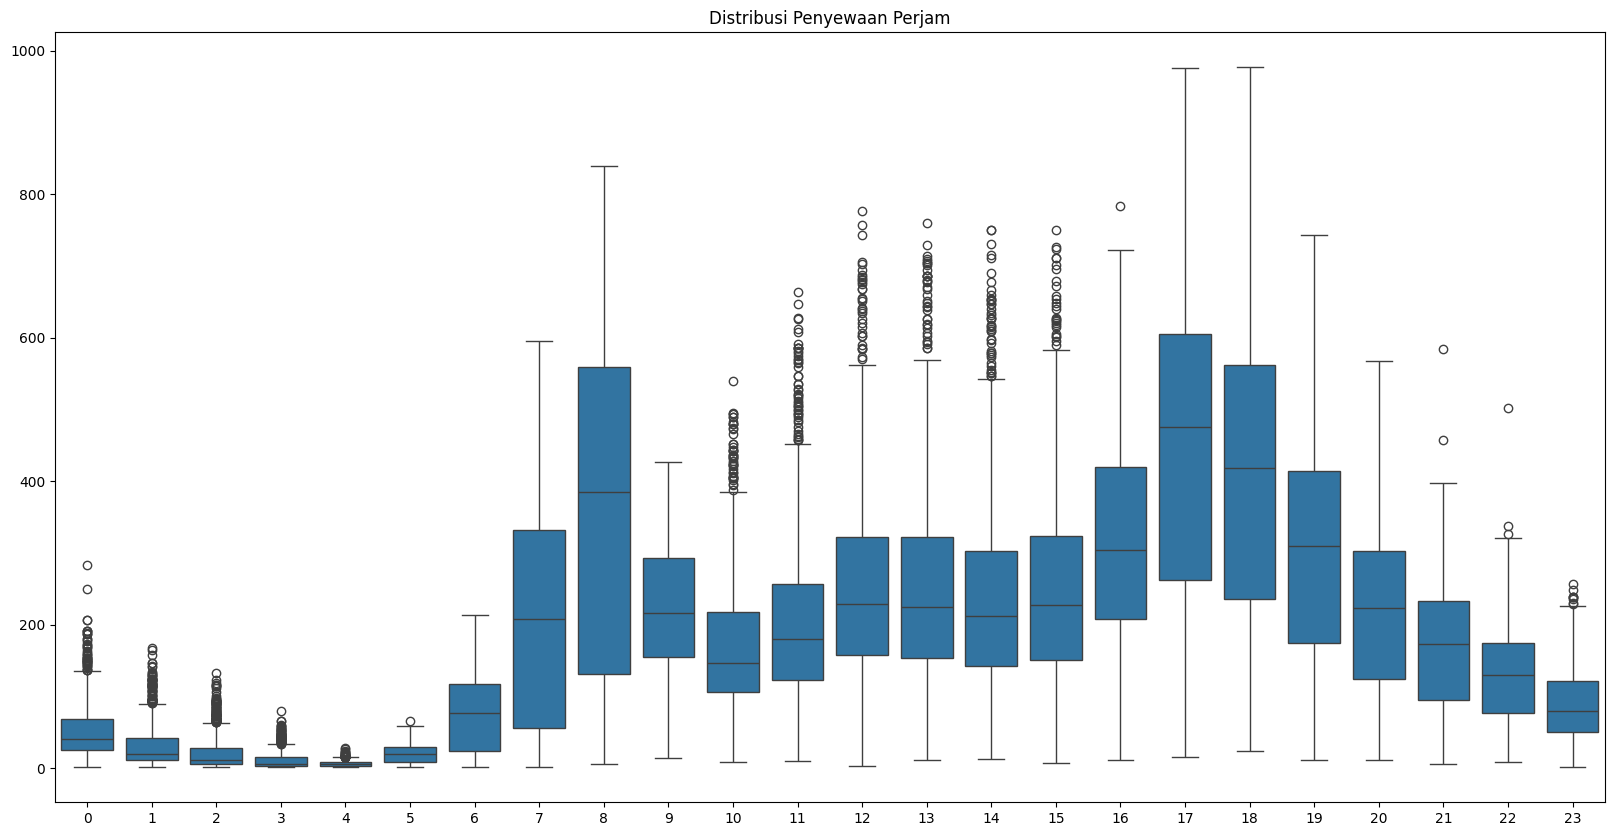

In [ ]:
# Membuat boxplot untuk memvisualisasi distribusi penyewaan perjam  selama tahun 2011 - 2012
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(
  x=hourly_df['hr'],
  y=hourly_df['cnt']
)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Distribusi Penyewaan Perjam")
plt.show()

Berdasarkan analisis kedua dataframe diatas, dapat disimpulkan beberapa hal berikut:

**Analisis Jumlah Penyeewaan**
- Secara keseluruhan (2011-2012), terdapat 3.292.679 penyewaan (kasual + teregistrasi)
- Persentase penyewa teregistrasi lebih besar ketimbang persentase penyewa kasual (81% > 19%).
- Persentase penyewa di hari kerja lebih besar ketimbang persentase penyewa di hari libur & akhir pekan (70% > 30%).
- Kebanyakan penyewa menyewa di hari cerah/awan ringan (68%), dan paling sedikit di hari hujan lebat/hujan es (0%).
- Kebanyakan penyewa menyewa di musim gugur (32%), dan paling sedikit di musim semi (14%).
- Jam 5 sore adalah waktu penyewaan tertinggi (10%), sedangkan jam 4 pagi adalah waktu penyewaan terendah (4%).
- Bulan Agustus adalah bulan dengan tingkat penyewaan tertinggi (10%), sementara bulan Januari merupakan bulan dengan tingkat penyewaan terendah (4%).
- Persentase penyewaan di tahun 2012 lebih tinggi ketimbang di tahun 2011 (62% > 38%)

**Analisis Outlier Penyewaan**
- Berdasarkan boxplot distribusi penyewaan perjam, terdapat beberapa jam dimana terdapat loncatan penyewaan yang diatas rata-rata, dimana pada rentang jam 10 - 15 terdapat paling banyak loncatan.
- Berdasarkan boxplot distribusi penyewaan hari dalam minggu, tidak ditemukan anomali pada hari manapun.
- Berdasarkan boxplot distribusi penyewaan bulanan, tidak ditemukan anomali pada bulan manapun.
- Berdasarkan boxplot distribusi penyewaan tahunan, terdapat outlier bawah (low outlier) pada tahun 2012. Saat kita investigasi, outlier tersebut terdapat pada data dimana jumlah penyewaan hanya berjumlah 22 orang dan terjadi pada tanggal 29 Oktober 2012. Jika kita investigasi lebih jauh lagi melalui pencarian search engine, pada tanggal tersebut terjadi topan sandy di wilayah Washington DC.

**Analisis Korelasi**
- Terdapat 2 kolom yang berkolerasi positif dengan total jumlah penyewa, yaitu:
  - temp
  - atemp
- Terdapat 2 kolom yang berkolerasi negatif dengan total jumlah penyewa, yaitu:
  - hum
  - windspeed

## **Visualization & Explanatory Analysis**





### Pertanyaan 1: Bagaimana jumlah penyewaan pada setiap musim ataupun cuaca?

In [ ]:
def create_season_df(df):
  season_df = (df.groupby('season')['cnt']
                .sum()
                .sort_values(ascending=False)
                .reset_index()
  )
  return season_df


def create_weather_df(df):
  weather_df = (df.groupby('weathersit')['cnt']
                .sum()
                .sort_values(ascending=False)
                .reset_index()
  )
  return weather_df

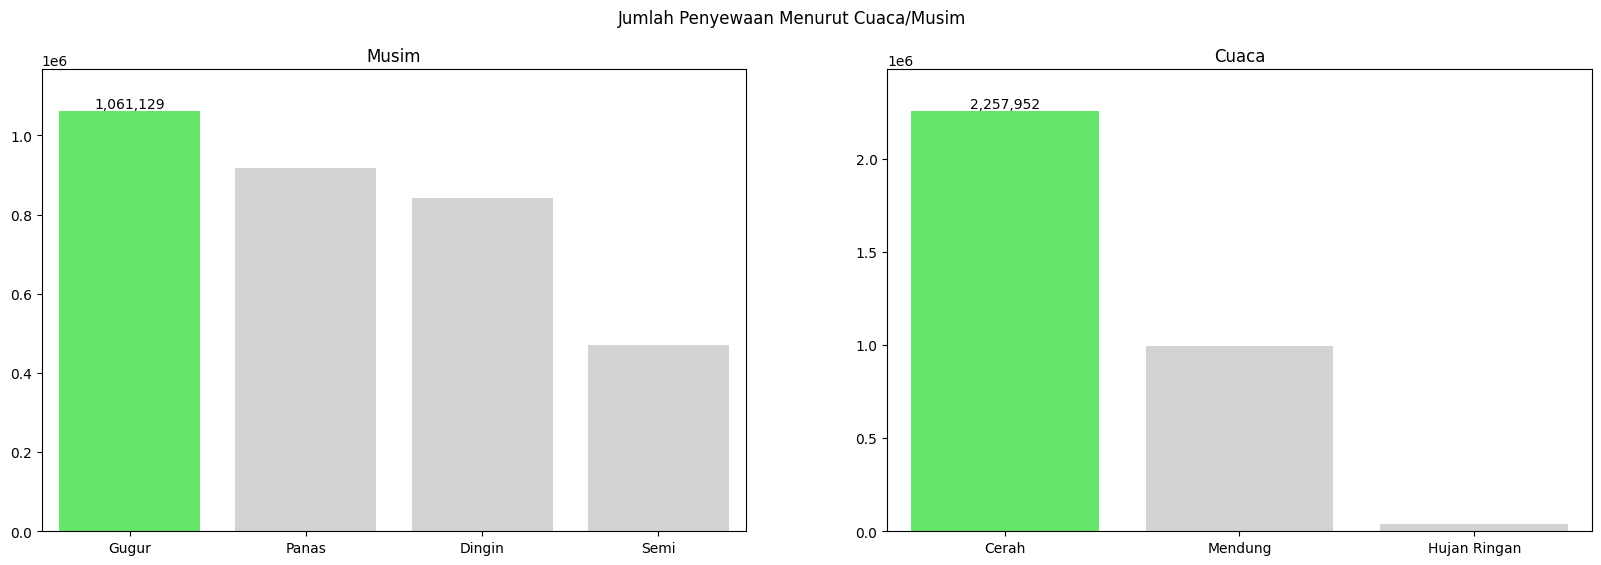

In [ ]:
# Membuat barchart untuk memvisualisasi jumlah penyewaan pada setiap musim ataupun cuaca (Harian)
colors_1 = ['#4FFB55', '#D3D3D3', '#D3D3D3', '#D3D3D3']
colors_2 = ['#4FFB55', '#D3D3D3', '#D3D3D3']
weather_daily_df = create_weather_df(daily_df)
season_daily_df = create_season_df(daily_df)
fig, axes = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

# First chart: season
sns.barplot(
    x='season',
    y='cnt',
    hue='season',
    data=season_daily_df,
    palette=colors_1,
    ax=axes[0]
)
tallest_value = season_daily_df['cnt'].max()
axes[0].bar_label(
    axes[0].containers[0],
    labels=['{:,}'.format(tallest_value)],
    label_type='edge'
)
axes[0].margins(y=0.1)
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].set_title("Musim")

# Second chart: weather
sns.barplot(
    x='weathersit',
    y='cnt',
    hue='weathersit',
    data=weather_daily_df,
    palette=colors_2,
    ax=axes[1]
)
tallest_value = weather_daily_df['cnt'].max()
axes[1].bar_label(
    axes[1].containers[0],
    labels=['{:,}'.format(tallest_value)],
    label_type='edge'
)
axes[1].margins(y=0.1)
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
axes[1].set_title("Cuaca")


plt.suptitle("Jumlah Penyewaan Menurut Cuaca/Musim")
plt.show()

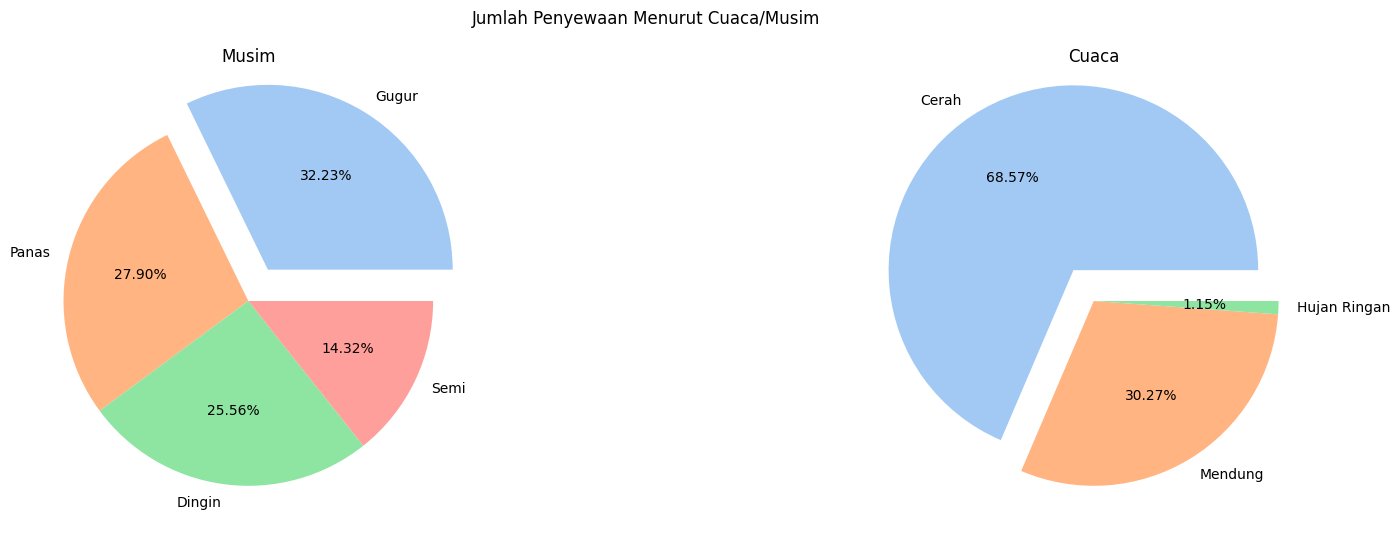

In [ ]:
# Membuat pie chart untuk memvisualisasi jumlah penyewaan pada setiap musim ataupun cuaca (harian)
explode_1 = (0.2, 0, 0)
explode_2 = (0.2, 0, 0, 0)
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

# First chart: season
ax[0].pie(
    x=season_daily_df['cnt'],
    labels=season_daily_df['season'],
    colors=sns.color_palette("pastel"),
    explode=explode_2,
    autopct='%.2f%%'
)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Musim")

# Second chart: weather
ax[1].pie(
    x=weather_daily_df['cnt'],
    labels=weather_daily_df['weathersit'],
    colors=sns.color_palette("pastel"),
    explode=explode_1,
    autopct='%.2f%%'
)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("Cuaca")

plt.suptitle("Jumlah Penyewaan Menurut Cuaca/Musim")
plt.show()

### Pertanyaan 2: Bagaimana jumlah penyewaan pada setiap hari kerja ataupun hari libur?

In [ ]:
def create_holiday_df(df):
  # The reason we use reset_index method at the end rather using the as_index=False
  # in the group_by() argument is to set index numbers after values have been ordered.
  holiday_df = (df.groupby('holiday')['cnt']
                .sum()
                .sort_values(ascending=False)
                .reset_index()
  )
  return holiday_df

def create_workingday_df(df):
  workingday_df = (df.groupby('workingday')['cnt']
                .sum()
                .sort_values(ascending=False)
                .reset_index()
  )
  return workingday_df

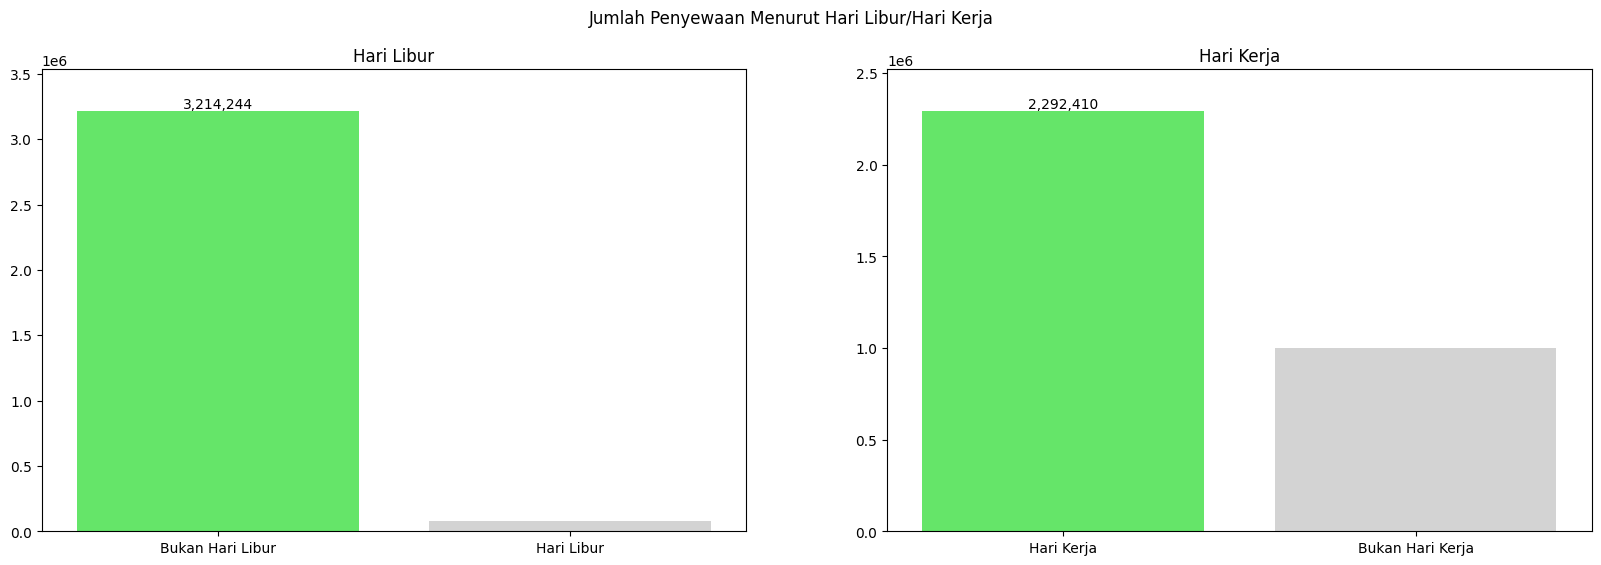

In [ ]:
# Membuat barchart untuk memvisualisasi jumlah penyewaan pada setiap hari libur/kerja
colors_1 = ['#4FFB55', '#D3D3D3']
colors_2 = ['#4FFB55', '#D3D3D3']
holiday_df = create_holiday_df(daily_df)
workingday_df = create_workingday_df(daily_df)
fig, axes = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

# First chart: holiday
sns.barplot(
    x='holiday',
    y='cnt',
    hue='holiday',
    data=holiday_df,
    palette=colors_1,
    ax=axes[0]
)
tallest_value = holiday_df['cnt'].max()
axes[0].bar_label(
    axes[0].containers[0],
    labels=['{:,}'.format(tallest_value)],
    label_type='edge'
)
axes[0].margins(y=0.1)
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].set_title("Hari Libur")

# Second chart: workingday
sns.barplot(
    x='workingday',
    y='cnt',
    hue='workingday',
    data=workingday_df,
    palette=colors_2,
    ax=axes[1]
)
tallest_value = workingday_df['cnt'].max()
axes[1].bar_label(
    axes[1].containers[0],
    labels=['{:,}'.format(tallest_value)],
    label_type='edge'
)
axes[1].margins(y=0.1)
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
axes[1].set_title("Hari Kerja")

plt.suptitle("Jumlah Penyewaan Menurut Hari Libur/Hari Kerja")
plt.show()

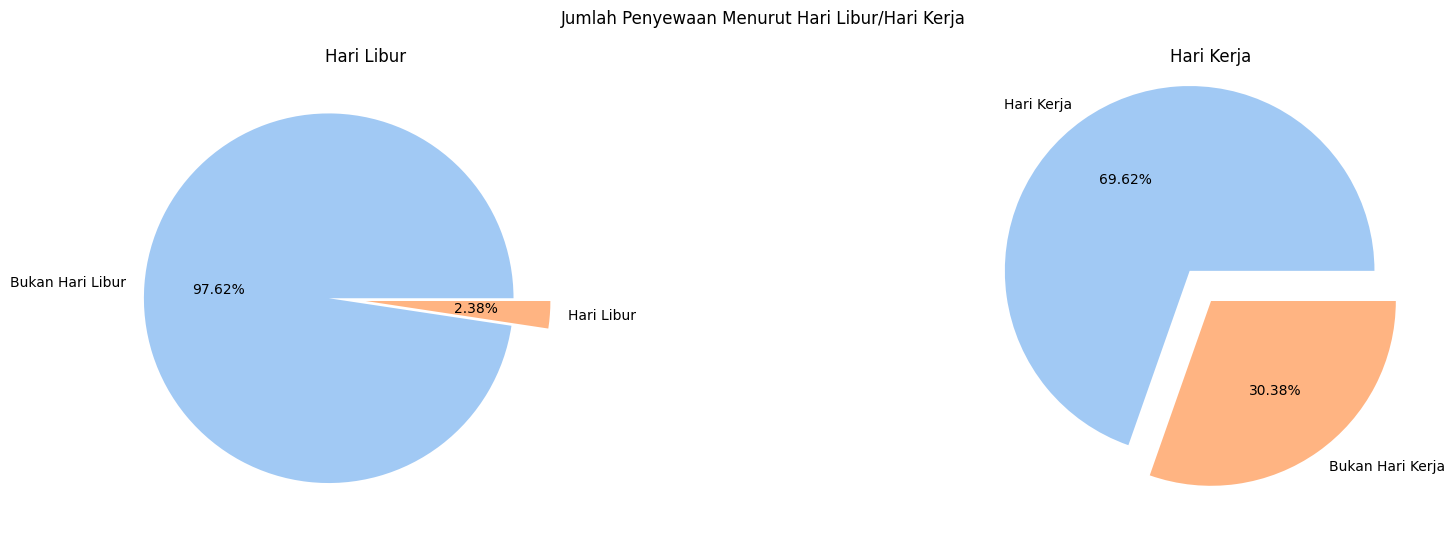

In [ ]:
# Membuat pie chart untuk memvisualisasi jumlah penyewaan pada setiap musim ataupun cuaca (harian)
explode = (0.2, 0)
fig, axes = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

# First chart: season
axes[0].pie(
    x=holiday_df['cnt'],
    labels=holiday_df['holiday'],
    colors=sns.color_palette("pastel"),
    explode=explode,
    autopct='%.2f%%'
)
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].set_title("Hari Libur")

# Second chart: weather
axes[1].pie(
    x=workingday_df['cnt'],
    labels=workingday_df['workingday'],
    colors=sns.color_palette("pastel"),
    explode=explode,
    autopct='%.2f%%'
)
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
axes[1].set_title("Hari Kerja")

plt.suptitle("Jumlah Penyewaan Menurut Hari Libur/Hari Kerja")
plt.show()

### Pertanyaan 3: Bagaimana korelasi antar variabel numerik pada dataset? (variabel suhu, suhu semu, kelembapan, kecepatan angin dan total jumlah penyewa)

In [ ]:
def create_corr_df(df):
  kolom_numerik = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
  corr_df = df[kolom_numerik].corr()
  return corr_df

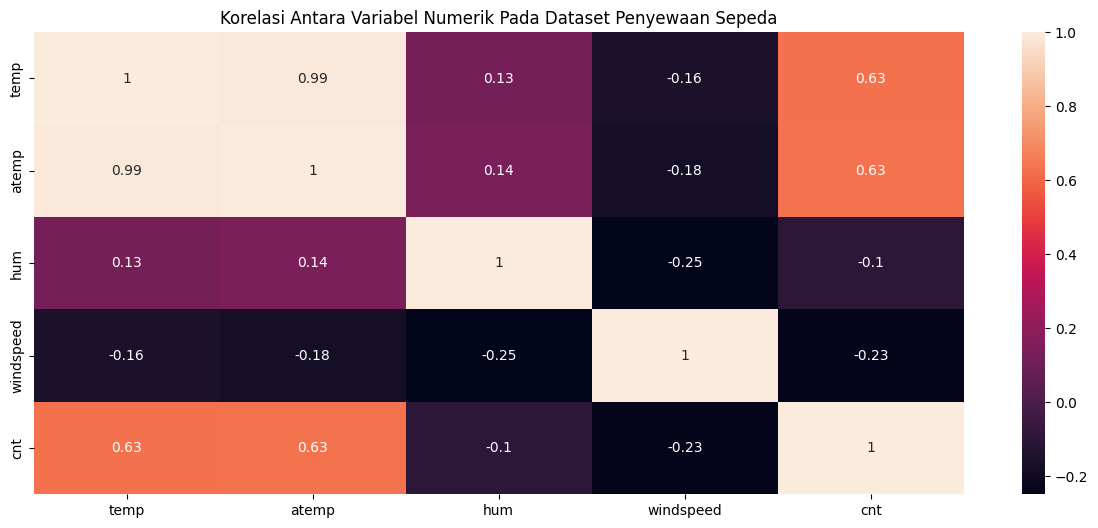

In [ ]:
# Membuat heatmap untuk memvisualisasi korelasi antara variabel numerik pada dataset
corr_df = create_corr_df(daily_df)
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(
    corr_df,
    annot=True,
    ax=ax
)
ax.set_title('Korelasi Antara Variabel Numerik Pada Dataset Penyewaan Sepeda')
plt.show()

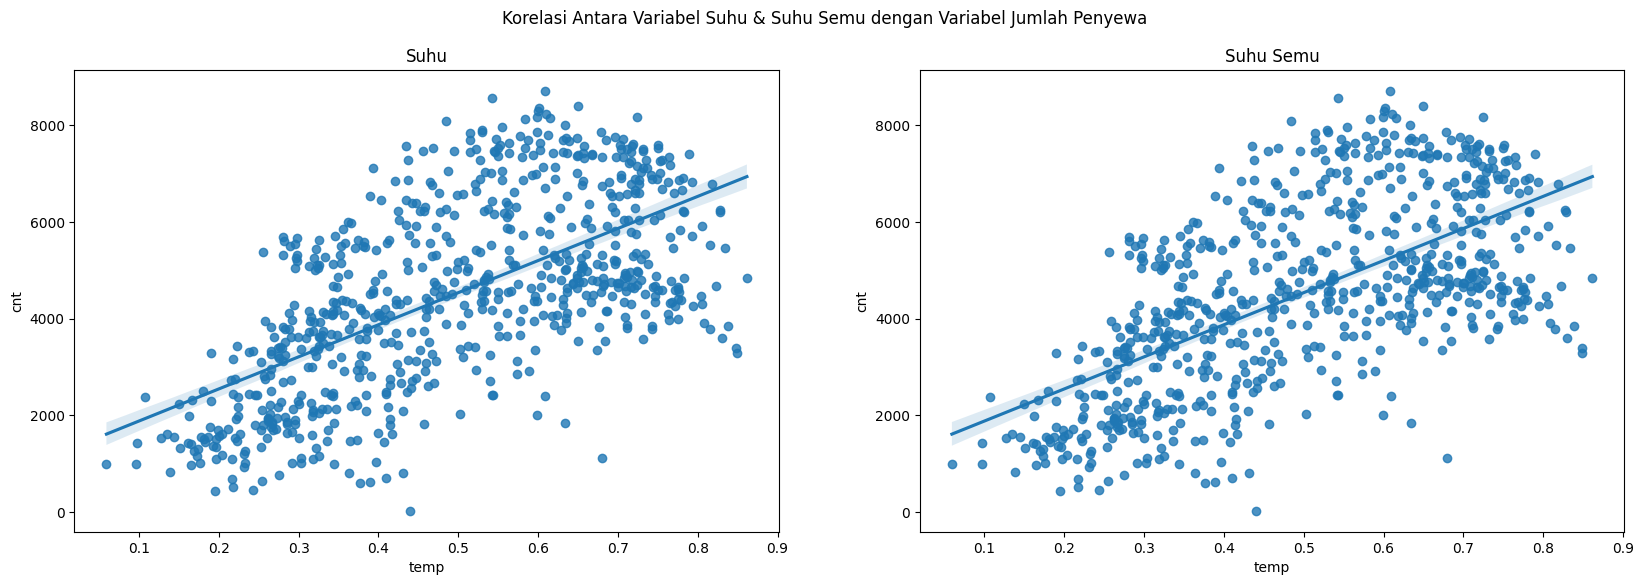

In [ ]:
# Membuat scatter plot untuk memvisualisasikan korelasi antara variabel temp & atemp dengan variabel jumlah penyewa
fig, axes = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

# First chart: temp
sns.regplot(
    x='temp',
    y='cnt',
    data=daily_df,
    ax=axes[0]
)
axes[0].set_title("Suhu")

# Second chart: weather
sns.regplot(
    x='temp',
    y='cnt',
    data=daily_df,
    ax=axes[1]
)
axes[1].set_title("Suhu Semu")


plt.suptitle("Korelasi Antara Variabel Suhu & Suhu Semu dengan Variabel Jumlah Penyewa")
plt.show()

### Pertanyaan 4: Bagaimana tren penyewaan setiap harinya selama tahun 2011 - 2012?

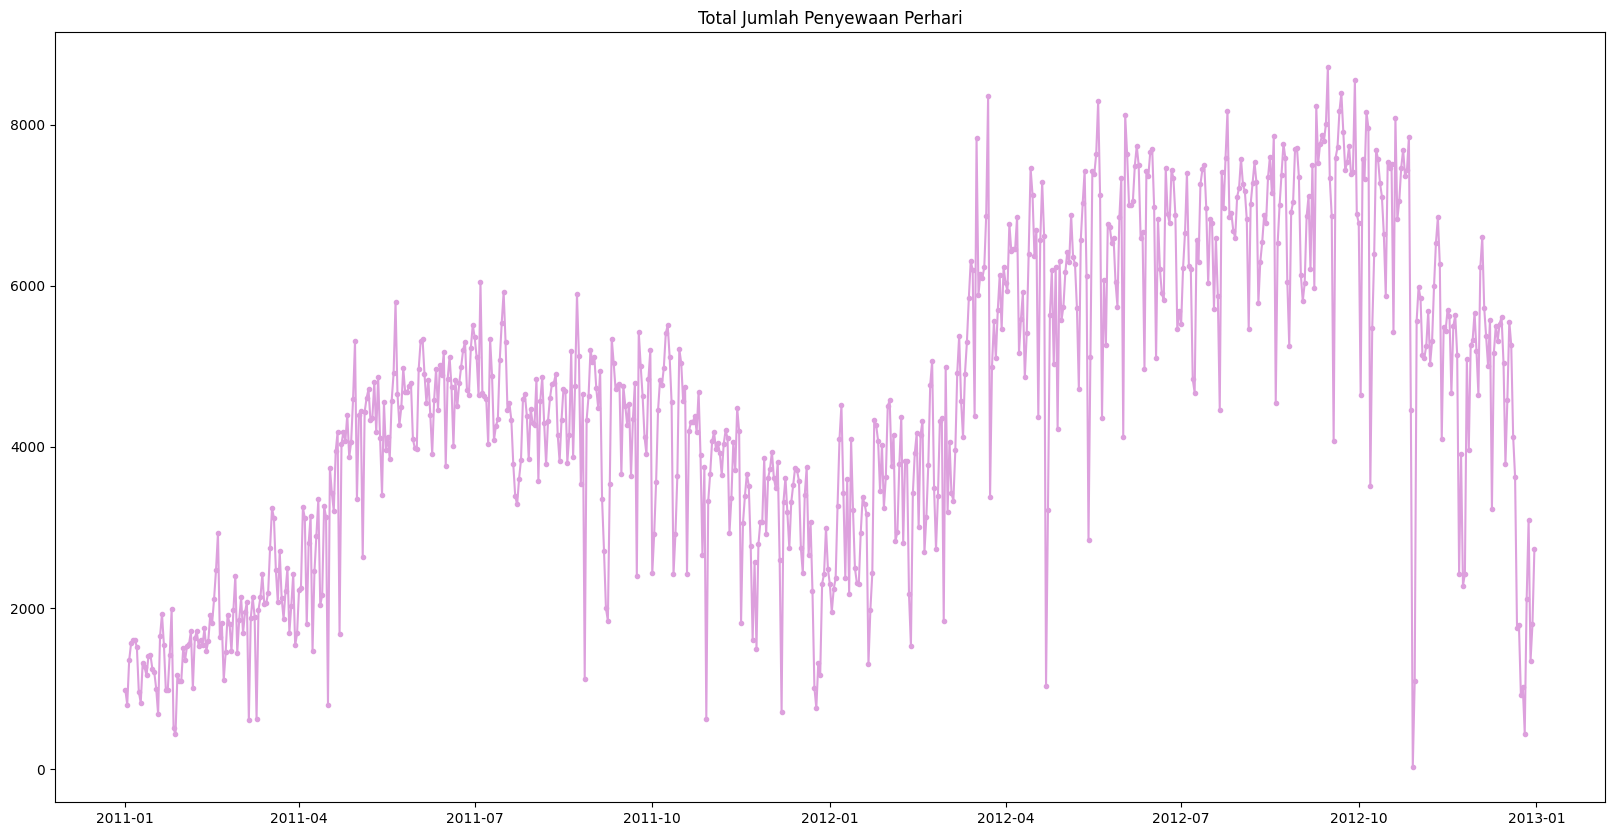

In [ ]:
# Membuat line chart untuk memvisualisasi total penyewaan tiap harinya selama tahun 2011 - 2012
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(
    daily_df['dteday'],
    daily_df['cnt'],
    color='plum',
    marker='.'
)
ax.set_title("Total Jumlah Penyewaan Perhari")
plt.show()

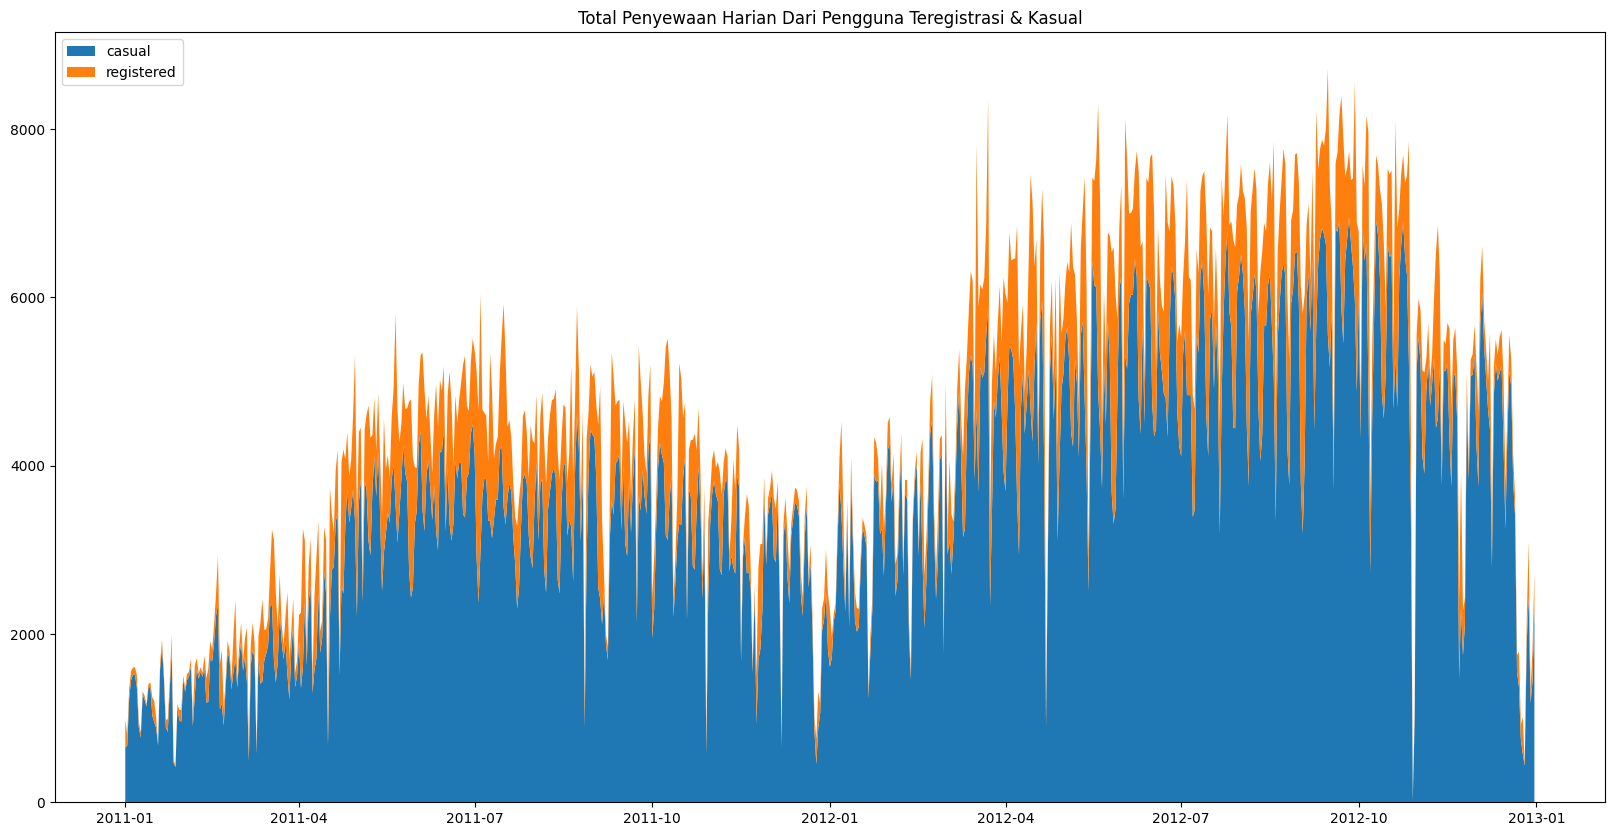

In [ ]:
# Membuat stacked area chart untuk memvisualisasi jumlah penyewaan dari pengguna teregistrasi & kasual
# tiap harinya selama tahun 2011 - 2012
fig, ax = plt.subplots(figsize=(20,10))
ax.stackplot(
    daily_df['dteday'],
    daily_df['registered'],
    daily_df['casual'],
    labels=['casual', 'registered']
)
ax.legend(loc='upper left')
ax.set_title("Total Penyewaan Harian Dari Pengguna Teregistrasi & Kasual")
plt.show()

## **Conclusion**

- **Conclusion pertanyaan 1: Bagaimana jumlah penyewaan pada setiap musim ataupun cuaca?**
  - Musim gugur merupakan musim dengan jumlah penyewaan tertinggi, bahkan 2 kali lebih tinggi dari jumlah penyewaan di musim semi (musim dengan jumlah penyewaan terendah).
  - Cuaca cerah adalah cuaca dimana orang paling banyak menyewa sepeda, dan berdasarkan analisis harian, tidak terdapat penyewa sepeda di cuaca badai petir.

- **Conclusion pertanyaan 2: Bagaimana jumlah penyewaan pada setiap hari kerja ataupun hari libur?**
  - Orang cenderung melakukan penyewaan diluar hari libur/akhir pekan.

- **Conclusion pertanyaan 3: Bagaimana korelasi antar variabel numerik pada dataset? (variabel suhu, suhu semu, kelembapan, kecepatan angin dan total jumlah penyewa)**
  - Terdapat korelasi positif yang cukup signifikan antara variabel suhu & suhu semu dengan variabel total jumlah penyewa. Hal ini mungkin disebabkan oleh kenaikan suhu yang biasanya mengindikasikan cuaca cerah dan menciptakan kondisi yang kondusif untuk orang menyewa sepeda.

- **Conclusion pertanyaan 4: Bagaimana tren penyewaan setiap harinya selama tahun 2011 - 2012?**
  - Pada tiap tahunnya, secara umum terjadi kenaikan jumlah penyewaan pada bulan ke-1 hingga bulan ke-7, sementara terjadi penurunan dari bulan ke-7 hingga bulan ke-12.
  - Rata-rata, penyewa teregistrasi berjumlah lebih banyak ketimbang penyewa kasual.

# Snakey!


In [ ]:
import numpy as np

In [ ]:
mgrid = np.mgrid[0:5, 0:5]
mgrid

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [ ]:
ogrid = np.ogrid[0:5, 0:5]
ogrid

[array([[0],
        [1],
        [2],
        [3],
        [4]]),
 array([[0, 1, 2, 3, 4]])]

In [ ]:
x = np.r_[3,[0]*5,-1:1:10j]
x

array([ 3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.        , -0.77777778, -0.55555556, -0.33333333,
       -0.11111111,  0.11111111,  0.33333333,  0.55555556,  0.77777778,
        1.        ])

In [ ]:
b = np.array([[(1+5j,2j,3j), (4j,5j,6j)], [(1+5j,2j,3j), (4j,5j,6j)]])
c = np.array([[(1.5,2,3), (4,5,6)], [(3,2,1), (4,5,6)]])

In [ ]:
print(b)

[[[1.+5.j 0.+2.j 0.+3.j]
  [0.+4.j 0.+5.j 0.+6.j]]

 [[1.+5.j 0.+2.j 0.+3.j]
  [0.+4.j 0.+5.j 0.+6.j]]]


In [ ]:
x = np.c_[b,c]
x

array([[[1. +5.j, 0. +2.j, 0. +3.j, 1.5+0.j, 2. +0.j, 3. +0.j],
        [0. +4.j, 0. +5.j, 0. +6.j, 4. +0.j, 5. +0.j, 6. +0.j]],

       [[1. +5.j, 0. +2.j, 0. +3.j, 3. +0.j, 2. +0.j, 1. +0.j],
        [0. +4.j, 0. +5.j, 0. +6.j, 4. +0.j, 5. +0.j, 6. +0.j]]])

In [ ]:
b.flatten()

array([1.+5.j, 0.+2.j, 0.+3.j, 0.+4.j, 0.+5.j, 0.+6.j, 1.+5.j, 0.+2.j,
       0.+3.j, 0.+4.j, 0.+5.j, 0.+6.j])

In [ ]:
np.hstack((b,c))

array([[[1. +5.j, 0. +2.j, 0. +3.j],
        [0. +4.j, 0. +5.j, 0. +6.j],
        [1.5+0.j, 2. +0.j, 3. +0.j],
        [4. +0.j, 5. +0.j, 6. +0.j]],

       [[1. +5.j, 0. +2.j, 0. +3.j],
        [0. +4.j, 0. +5.j, 0. +6.j],
        [3. +0.j, 2. +0.j, 1. +0.j],
        [4. +0.j, 5. +0.j, 6. +0.j]]])

In [ ]:
np.vstack((b,c))

array([[[1. +5.j, 0. +2.j, 0. +3.j],
        [0. +4.j, 0. +5.j, 0. +6.j]],

       [[1. +5.j, 0. +2.j, 0. +3.j],
        [0. +4.j, 0. +5.j, 0. +6.j]],

       [[1.5+0.j, 2. +0.j, 3. +0.j],
        [4. +0.j, 5. +0.j, 6. +0.j]],

       [[3. +0.j, 2. +0.j, 1. +0.j],
        [4. +0.j, 5. +0.j, 6. +0.j]]])

In [ ]:
a = np.array([[1],[2],[3]])
b = np.array([[4],[5],[6]])
np.hstack((a,b))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
np.vstack((a,b))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [ ]:
from numpy import poly1d
p = poly1d([3,4,5])
p

poly1d([3, 4, 5])

In [ ]:
def myfunc(a):
  if a < 0:
    return a*2
  else:
    return a/2

vector_func = np.vectorize(myfunc)
x = vector_func([1,2,3])
x

array([0.5, 1. , 1.5])

In [ ]:
np.real(1 + 32j)

1.0

In [ ]:
np.imag(1 + 32j)

32.0

In [ ]:
np.real_if_close(32j, tol=10000)

array(0.+32.j)

In [ ]:
np.cast['f'](np.pi)

array(3.1415927, dtype=float32)

In [ ]:
np.angle(32j)

1.5707963267948966

In [ ]:
g = np.linspace(0, np.pi, num=5)
g

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265])

In [ ]:
g[1] - g[0]

0.7853981633974483

In [ ]:
g[2] - g[1]

0.7853981633974483

In [ ]:
np.unwrap(g)

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265])